<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Statistical Testing: Single Sample Tests For Mean 

---

Let's now do some statistical testing!

For this example, imagine you're working at a software development company that is working on a "new" mobile game.

And the game is now live!!!

<img src="assets/images/fruitcrushepic.png" style="width:50%" />

The product management likes to have simple operational/performance rules for the live app:

- One such rule is: "splash screen should not be shown for longer than 3 seconds, on average"
- However, QA did extensive testing and confirmed that spalsh screen is not displayed for longer than 3 seconds, on average, for all supported iOS and Android devices.

However, 6 hours after the game launch, the average loading time started to exceed this threshold rule!

#### Let's load the standard libraries.

We'll also be using [Statsmodels](http://statsmodels.sourceforge.net/), since it has some nice characteristics for linear modeling & hypothesis testing. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from IPython.display import Image

import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
from collections import OrderedDict


from __future__ import print_function
%matplotlib inline

#### First, let's generate some fake data for analysis and plot it

In [3]:
observation_hours = 7  # your game was released 7 hours ago
expected_installs = 60 # expected number of installs per hour
loading_times = []
loading_times_averages = []
np.random.seed(12) # Seed needed to reproduce our particular scenario

for ix, installs in enumerate(np.random.poisson(lam=expected_installs, 
                                                size=observation_hours)):
    loading_times.append( np.random.gamma(shape=3, scale=.95, 
                                          size=installs) )
    loading_times_averages.append( loading_times[ix].mean() )



(2.3, 3.5)

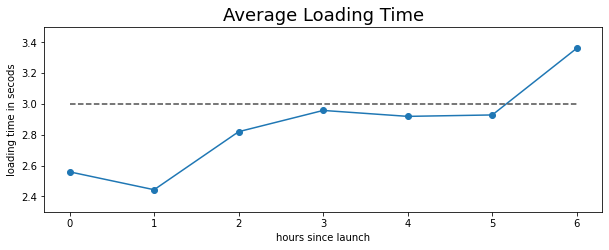

In [3]:
fig, ax = plt.subplots(figsize=(10,3.4))    
plot(loading_times_averages, marker='o')
title('Average Loading Time', fontdict={'size':18})
plot([0,observation_hours-1],[3,3],'--',color='0.3')
xlabel('hours since launch')
ylabel('loading time in secods')
ylim(2.3,3.5)
# fig.savefig('01.01.png', dpi=200)



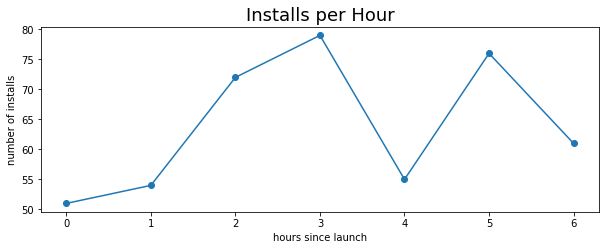

In [4]:
fig, ax = plt.subplots(figsize=(10,3.4))    
plot([len(x) for x in loading_times], marker='o')
title('Installs per Hour', fontdict={'size':18})
xlabel('hours since launch')
ylabel('number of installs');
pass
# fig.savefig('01.02.png', dpi=200)

#### Now, the basis for our hypothesis testing: is the average loading time in the last hour consistent with a mean of <= 3 seconds?

**Null Hypothesis:**
- population mean is <=3 seconds 

**Alternative Hypothesis:**
- population mean is >3 seconds 


To test this, we need to perform a **t-test for one sample**.

Test:
- single sample, one-sided $t$-test. $\alpha = 0.05$



<img src="assets/images/testing_1.png" style="width:100%" />

### *One Sample t-test*

### $t=\frac{\overline{x}-\mu_0}{SE}=\frac{\overline{x}-\mu_0}{s/\sqrt{n}}$

where:

- $\overline{x}$ - sample mean

- $\mu_0$ = population mean, according to null-hypothesis

- $s=\sqrt{\frac{\sum{(x_i-\overline{x})^2}}{n-1}}$ - sample standard deviation (with Bessel's correction)

- $SE = \frac{s}{\sqrt{n}}$ - Standard Error

#### Let's plot individual loading times for all users in last hour

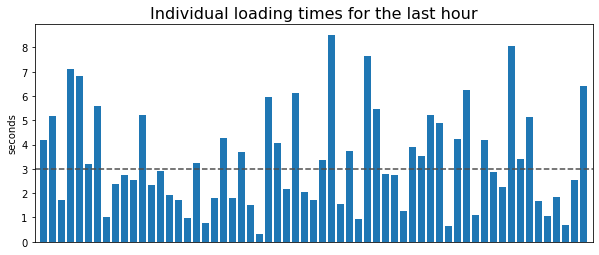

In [5]:
# Let's plot individual loading times for all users in last hour
fig, ax = plt.subplots(figsize=(10,4))
bar(range(loading_times[6].shape[0]), loading_times[6], align='center')
plot([-1,100],[3,3],'--',color='0.3')
xlim(-1,61)
title('Individual loading times for the last hour', fontdict={'size':16})
ylabel('seconds')
xticks([])
pass
# fig.savefig('01.03.Loading Times for last hour.png')

#### Using t-test from scipy.stats, let's calculate the p-statistic.

In [6]:
# Same thing, using t-test from scipy.stats
import scipy.stats as stats
t, p = stats.ttest_1samp(loading_times[6], popmean=3.0)

print('t-statistic = {t} \np-value = {p}'.format(t=t,p=p/2))

t-statistic = 1.38005787853313 
p-value = 0.08634481804336265


#### Do we reject the null hypothesis?

p-value is > 0.05, so we fail to reject the null hypothesis. We should let the test run for longer to see if this is an outlier, and if our PM's fears are realised.

####  And finally, let's calculate the confidence intervals

#### $CI = \overline{x} ± t_{critical} \cdot SE $ 

- where $\overline{x}$ is the  sample mean

- $t_{critical}$ - t-statistic for a given $\alpha$ level.
Depends on a sample size and desired confidence level (e.g. 95%)


- $SE=\frac{s}{\sqrt{n}}$ - Standard Error

In [7]:
x = loading_times[6]
SE = stats.sem(x) #Standard Error
t_c = stats.t.ppf(0.95, df=len(x)-1) #t-critical

CI = x.mean() - t_c*SE , x.mean() + t_c*SE
CI

(2.923738205913708, 3.800617983973862)

**So, our 95% Confidence Interval for the mean is [2.923738205913708, 3.800617983973862]**